# 푸리에 계수

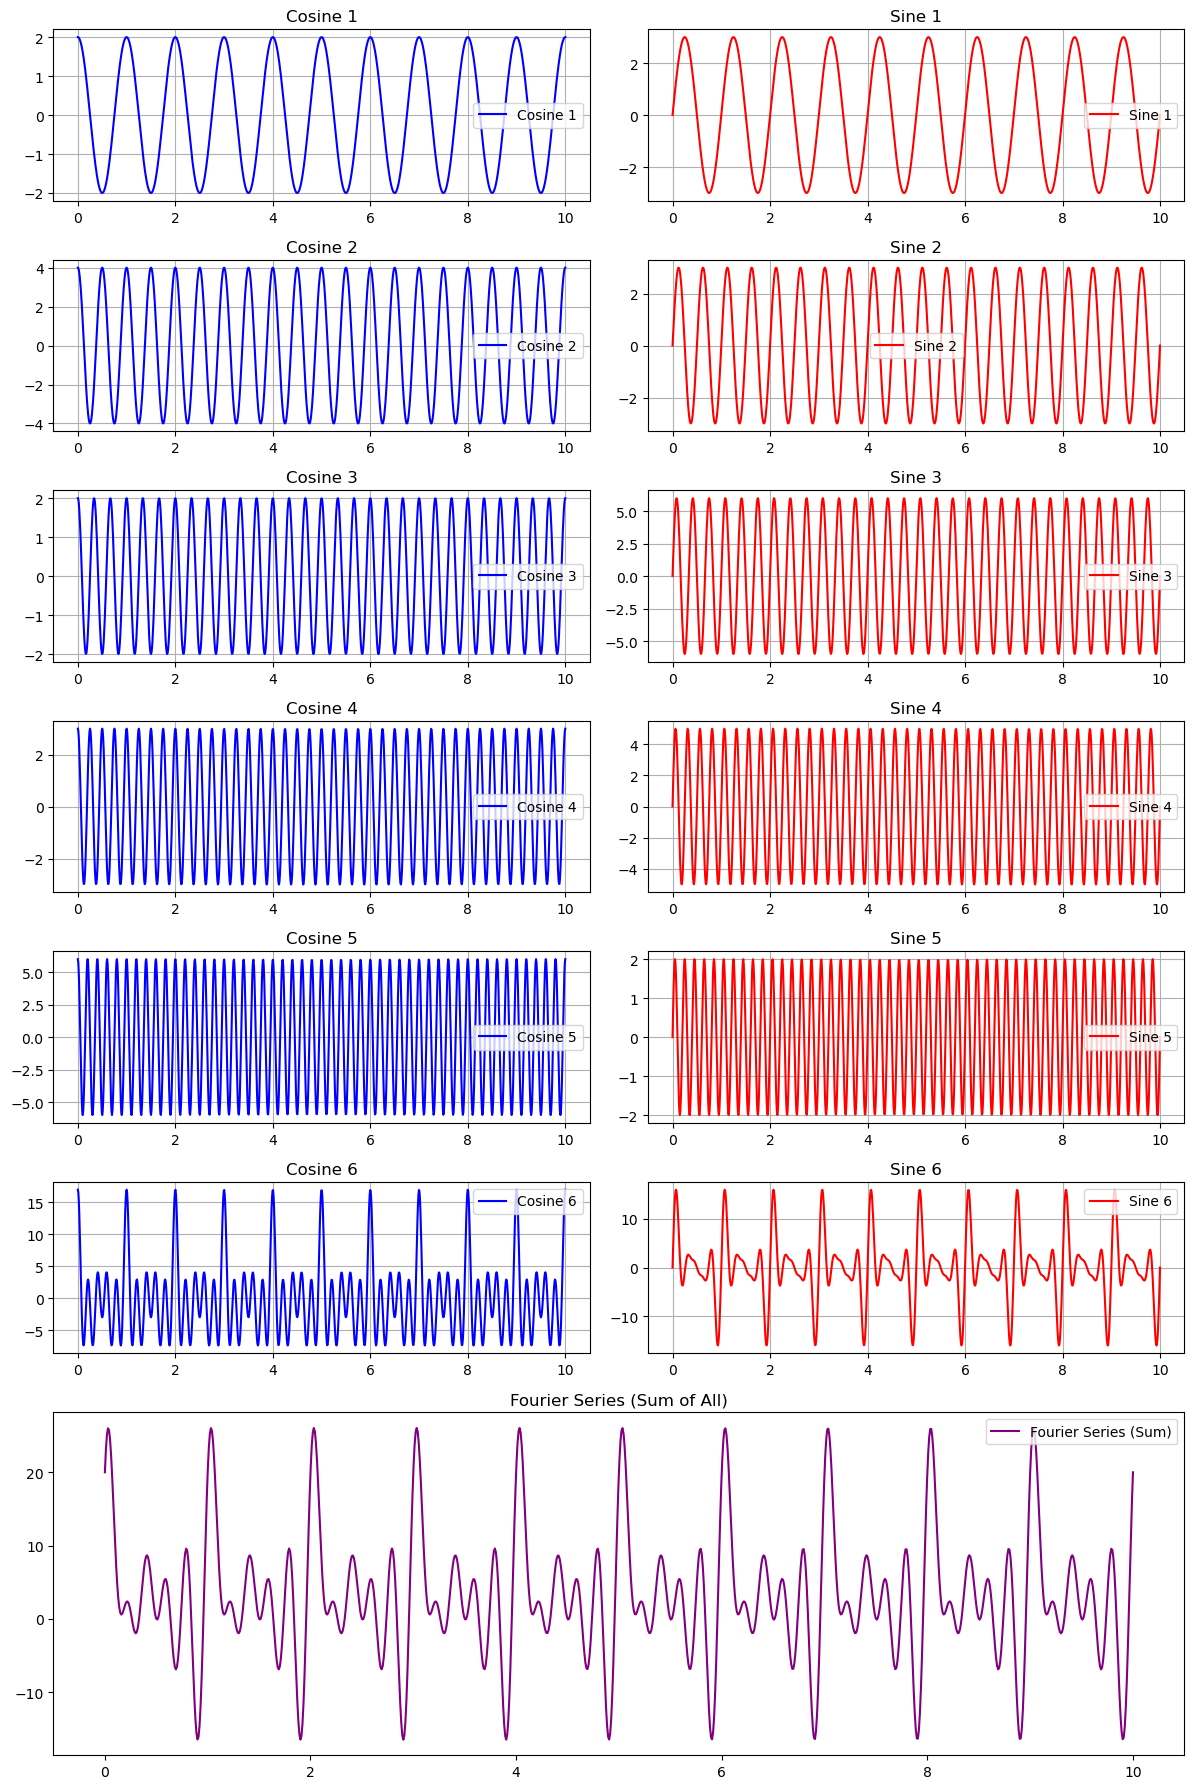

a0 = 3.0000000000000018
Cosine coefficients (a_n): [np.float64(6.0000000000000036), np.float64(-3.907985046680551e-15), np.float64(-3.1086244689504383e-15), np.float64(-9.237055564881303e-15), np.float64(1.7763568394002506e-16), np.float64(-3.4638958368304887e-15)]
Sine coefficients (b_n): [np.float64(3.197442310920451e-15), np.float64(-7.815970093361103e-15), np.float64(3.4638958368304887e-15), np.float64(6.394884621840902e-15), np.float64(4.4408920985006264e-17)]
1.14.1


In [44]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec
import scipy


def integrate_trapz(y, x):
    return np.trapezoid(y, x)

# 데이터 정의
T = 10  # 주기
x = np.linspace(0, T, 1000)
a0 = 3
a = np.array([2, 4, 2, 3, 6, 7])
b = np.array([3, 3, 6, 5, 2, 4])

# Cosine 시리즈
cy1 = a[0] * np.cos(2 * np.pi * x)
cy2 = a[1] * np.cos(2 * np.pi * 2 * x)
cy3 = a[2] * np.cos(2 * np.pi * 3 * x)
cy4 = a[3] * np.cos(2 * np.pi * 4 * x)
cy5 = a[4] * np.cos(2 * np.pi * 5 * x)
csumY = cy1 + cy2 + cy3 + cy4 + cy5

# Sine 시리즈
sy1 = b[0] * np.sin(2 * np.pi * x)
sy2 = b[1] * np.sin(2 * np.pi * 2 * x)
sy3 = b[2] * np.sin(2 * np.pi * 3 * x)
sy4 = b[3] * np.sin(2 * np.pi * 4 * x)
sy5 = b[4] * np.sin(2 * np.pi * 5 * x)
ssumY = sy1 + sy2 + sy3 + sy4 + sy5

# Fourier 급수처럼 보이게 합산
fourier_sum = a0 + csumY + ssumY

# GridSpec 설정
fig = plt.figure(figsize=(12, 18))
gs = GridSpec(7, 2, figure=fig, height_ratios=[1, 1, 1, 1, 1, 1, 2])  # 마지막 행을 더 크게 설정

# 각 subplot 추가
axes = []
for i in range(6):  # 6개의 subplot
    ax_left = fig.add_subplot(gs[i, 0])  # 왼쪽 열
    ax_right = fig.add_subplot(gs[i, 1])  # 오른쪽 열
    axes.append((ax_left, ax_right))

# Cosine 데이터
cy_data = [cy1, cy2, cy3, cy4, cy5, csumY]
sy_data = [sy1, sy2, sy3, sy4, sy5, ssumY]

for i in range(6):
    # 왼쪽 열: Cosine 데이터
    axes[i][0].plot(x, cy_data[i], color='blue', label=f'Cosine {i+1}')
    axes[i][0].set_title(f'Cosine {i+1}')
    axes[i][0].legend()
    axes[i][0].grid()

    # 오른쪽 열: Sine 데이터
    axes[i][1].plot(x, sy_data[i], color='red', label=f'Sine {i+1}')
    axes[i][1].set_title(f'Sine {i+1}')
    axes[i][1].legend()
    axes[i][1].grid()

# 마지막 행: Fourier 합 (왼쪽과 오른쪽 모두 병합)
ax_last_left = fig.add_subplot(gs[6, :])  # 마지막 행은 두 열을 병합
ax_last_left.plot(x, fourier_sum, color='purple', label='Fourier Series (Sum)')
ax_last_left.set_title('Fourier Series (Sum of All)')
ax_last_left.legend()

# 전체 레이아웃 조정
plt.tight_layout()
plt.show()


# 이제 각각의 계수 구하기

# 평균 계수 (a0)
a0 = (1 / T) * integrate_trapz(fourier_sum, x)

# 코사인 계수 (an)
def an(n):
    cos_term = fourier_sum * np.cos(2 * np.pi * n * x / T)
    return (2 / T) * integrate_trapz(cos_term, x)

# 사인 계수 (bn)
def bn(n):
    sin_term = fourier_sum * np.sin(2 * np.pi * n * x / T)
    return (2 / T) * integrate_trapz(sin_term, x)

# 계수 계산
a_coeffs = [an(n) for n in range(5 + 1)]
b_coeffs = [bn(n) for n in range(1, 5 + 1)]

# 결과 출력
print("a0 =", a0)
print("Cosine coefficients (a_n):", a_coeffs)
print("Sine coefficients (b_n):", b_coeffs)

print(scipy.__version__)